## House Prices Prediction

Lets import our libraries and look into our dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Lets see about the numerical columns.

In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The pricing is very skewed in nature and since we need to predict the house price with minimum error, we will have to first reduce it using log function and then restoring it using exp function.

Before using log :

skew = 1.8828757597682129


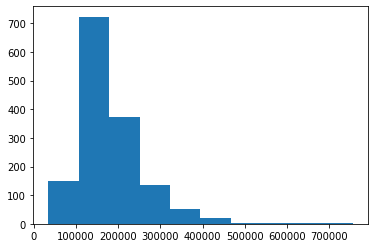

In [6]:
print('skew = {}'.format(train.SalePrice.skew()))
plt.hist(train.SalePrice)
plt.show()

After using log :

skew = 0.12134661989685333


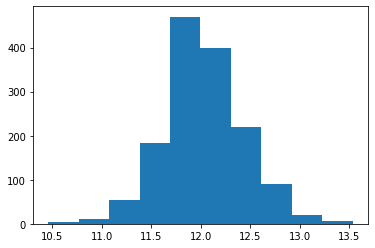

In [7]:
new_SalePrice = np.log1p(train.SalePrice)
print('skew = {}'.format(new_SalePrice.skew()))
plt.hist(new_SalePrice)
plt.show()

We can see that skew has reduced significantly by using log(). Now lets see the correlation between numerical columns and SalePrice. Before that, we need to see which columns are numerical.

### Numerical Features

In [8]:
numerical = train.select_dtypes(include=[np.number])
categorical = train.select_dtypes(exclude=[np.number])

print('no. of numerical features = {}'.format(numerical.shape[1]))
print('no. of categorical features = {}'.format(categorical.shape[1]))

no. of numerical features = 38
no. of categorical features = 43


In [9]:
numerical.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
corr = numerical.corr()['SalePrice'].sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We can see that some features like 'OverallQual' and 'GrLivArea' are dominant among other numerical features. And it also makes sense that overall-quality of the house, its living area and garage area are bound to make the sale price go higher.

Lets see how many numerical columns have empty cells, as need to impute them before moving forward.

In [11]:
fill_these = numerical.columns[numerical.isna().any()].tolist()
fill_these

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
ID = numerical.Id
numerical.drop('Id', axis=1, inplace=True)

c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


We also need to drop the outliers from the train dataset.

So lets see the scatter plot of some of the columns and then drop the outliers

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 1440x720 with 0 Axes>

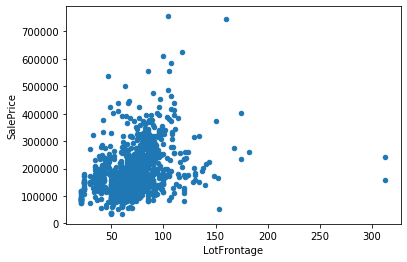

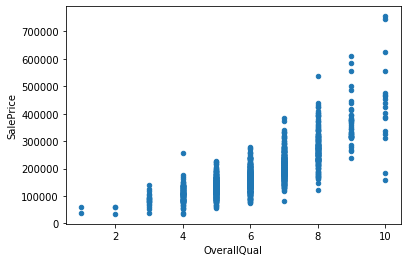

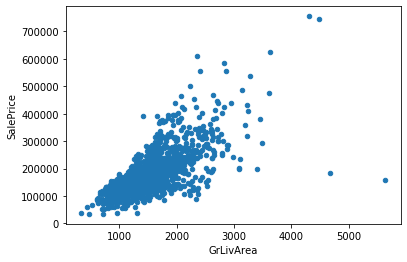

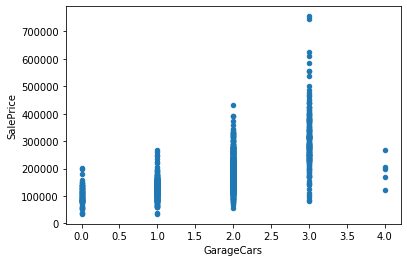

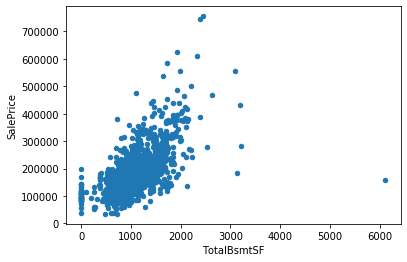

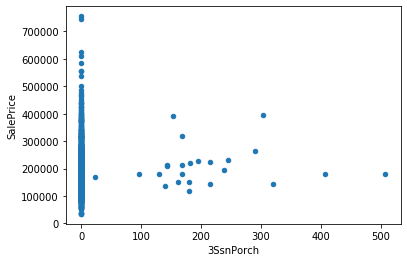

In [13]:
plt.figure(figsize=(20,10))
print(numerical.plot.scatter(x='LotFrontage',y='SalePrice'))
print(numerical.plot.scatter(x='OverallQual',y='SalePrice'))
print(numerical.plot.scatter(x='GrLivArea',y='SalePrice'))
print(numerical.plot.scatter(x='GarageCars',y='SalePrice'))
print(numerical.plot.scatter(x='TotalBsmtSF',y='SalePrice'))
print(numerical.plot.scatter(x='3SsnPorch',y='SalePrice'))

From above we see that less correlated columns (w.r.t to 'SalePrice') like '3ScnPorch' has more outliers. So lets put some conditions and remove them.

In [14]:
def dropping_outliers(data, condition):
    condition_to_drop = data[condition].index
    data = data.drop(condition_to_drop)

In [15]:
dropping_outliers(numerical, (numerical.SalePrice<100000) & (numerical.LotFrontage>150))
dropping_outliers(numerical, (numerical.LotFrontage>200))
dropping_outliers(numerical, (numerical.SalePrice>700000))
dropping_outliers(numerical, (numerical.SalePrice>700000))
dropping_outliers(numerical, (numerical.LotArea>60000))
dropping_outliers(numerical, (numerical.MasVnrArea>1450))
dropping_outliers(numerical, (numerical.BedroomAbvGr==8))
dropping_outliers(numerical, (numerical.KitchenAbvGr==3))
dropping_outliers(numerical, (numerical['3SsnPorch']>400))
dropping_outliers(numerical, (numerical.LotArea>100000))
dropping_outliers(numerical, (numerical.MasVnrArea>1300))
dropping_outliers(numerical, (numerical.BsmtFinSF1>2000) & (numerical.SalePrice<300000))
dropping_outliers(numerical, (numerical.BsmtFinSF2>200) & (numerical.SalePrice>350000))
dropping_outliers(numerical, (numerical.BedroomAbvGr==8))
dropping_outliers(numerical, (numerical.KitchenAbvGr==3))
dropping_outliers(numerical, (numerical.TotRmsAbvGrd==2))

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_num = pd.DataFrame(imputer.fit_transform(numerical))
imputed_num.columns = numerical.columns
imputed_num.index = numerical.index
numerical = imputed_num

In [17]:
numerical.isnull().sum().any()

False

Lets see our correlation with 'SalePrice' again

In [18]:
corr = numerical.corr()['SalePrice'].sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Lets drop the less correlated columns

In [19]:
drop_these_num = ['BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2',
                  'BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass']
numerical.drop(drop_these_num, axis=1, inplace=True)

So we have done our data wrangling and preprocessing for the numerical features. Lets head out for the categorical features.

### Categorical Features

In [20]:
categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [21]:
categorical.columns.sort_values()

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

Before we start analysing the categorical features, lets see what these columns have.

In [22]:
for c in categorical.columns:
    print('{:<14}'.format(c), categorical[c].unique())

MSZoning       ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street         ['Pave' 'Grvl']
Alley          [nan 'Grvl' 'Pave']
LotShape       ['Reg' 'IR1' 'IR2' 'IR3']
LandContour    ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities      ['AllPub' 'NoSeWa']
LotConfig      ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope      ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1     ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2     ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType       ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle     ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle      ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl       ['CompShg' 'WdShngl' 'Metal' 'Wd

Now lets go deeper into the columns and see which of them are useful for us.

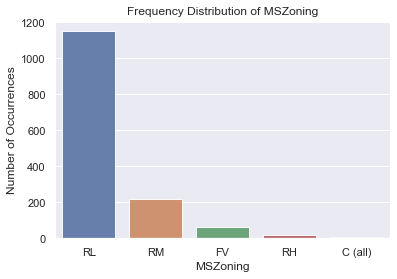

In [23]:
# Plotting 'MSZoning' as our first test subject

count_mszoning = categorical['MSZoning'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count_mszoning.index, count_mszoning.values, alpha=0.9)
plt.title('Frequency Distribution of MSZoning')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MSZoning', fontsize=12)
plt.show()

So we can see that a lot of them are 'RL' and rest are twice or thrice lesser than it. From these kind of graphs we can easily estimate and see which features to keep and which to discard.

In [24]:
categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Some of them have a lot of null values, but still from the 'description.txt', we can see that some null values are given since its not present in that house, for example: 'Fence'.

Below, I have created a class to encode every single categorical feature into numbers, so lets see the how does each column correlate to the 'SalePrice'

In [25]:
class EncodeCat:
    
    def __init__(self, data):
        self.data = data
        
    def full(self):
        self.Alley()
        self.BldgType()
        self.BsmtExposure()
        self.BsmtFinType()
        self.CentralAir()
        self.Condition()
        self.Electrical()
        self.Exterior()
        self.Fence()
        self.Foundation()
        self.Functional()
        self.GarageFinish()
        self.GarageType()
        self.Heating()
        self.HouseStyle()
        self.LandContour()
        self.LandSlope()
        self.LotConfig()
        self.LotShape()
        self.MSZoning()
        self.MasVnrType()
        self.MiscFeature()
        self.Neighborhood()
        self.PavedDrive()
        self.RoofMatl()
        self.RoofStyle()
        self.SaleCondition()
        self.SaleType()
        self.Street()
        self.Utilities()
        self.comparison_columns()
        
    def comparison_columns(self):
        points = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'nan':0 }
        cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual', 'HeatingQC',
                'FireplaceQu','GarageQual','GarageCond','PoolQC']
        for col in cols:
            encoded = [0 if pd.isnull(val) 
                       else points[val] for val in self.data[col]]
            self.data[col] = encoded

    def BsmtFinType(self):
        points = { 'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1 }
        cols = ['BsmtFinType1', 'BsmtFinType2']
        for col in cols:
            encoded = [0 if pd.isnull(val) 
                       else points[val] for val in self.data[col]]
            self.data[col] = encoded
            
    def Condition(self):
        points = { 'Artery':9, 'Feedr':8, 'Norm':7, 'RRNn':6, 'RRAn':5, 'PosN':4, 'PosA':3, 'RRNe':2, 'RRAe':1 }
        cols = ['Condition1', 'Condition2']
        for col in cols:
            encoded = [0 if pd.isnull(val) 
                       else points[val] for val in self.data[col]]
            self.data[col] = encoded
            
    def Exterior(self):
        points = { 'AsbShng':18, 'AsphShn':17, 'BrkComm':16, 'Brk Cmn':16, 'BrkFace':15, 
                  'CBlock':14, 'CmentBd':13, 'CemntBd':13, 'HdBoard':12, 'ImStucc':11, 
                  'MetalSd':10, 'Other':9, 'Plywood':8, 'PreCast':7, 'Stone':6, 'Stucco':5, 
                  'VinylSd':4, 'Wd Sdng':3, 'Wd Shng':2, 'WdShing':1 }
        cols = ['Exterior1st', 'Exterior2nd']
        for col in cols:
            encoded = [0 if pd.isnull(val) 
                       else points[val] for val in self.data[col]]
            self.data[col] = encoded
            
    def Alley(self):
        points = { 'Grvl':2, 'Pave':1 }
        self.data['Alley'] = [0 if pd.isnull(val) else points[val] for val in self.data['Alley']]
            
    def BsmtExposure(self):
        points = { 'Gd':4, 'Av':3, 'Mn':2, 'No':1 }
        self.data['BsmtExposure'] = [0 if pd.isnull(val) else points[val] for val in self.data['BsmtExposure']]

    def Fence(self):
        points = { 'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1 }
        self.data['Fence'] = [0 if pd.isnull(val) else points[val] for val in self.data['Fence']]
        
    def SaleCondition(self):
        points = { 'Normal':6, 'Abnorml':5, 'AdjLand':4, 'Alloca':3, 'Family':2, 'Partial':1 }
        self.data['SaleCondition'] = [0 if pd.isnull(val) else points[val] for val in self.data['SaleCondition']]
        
    def CentralAir(self):
        points = { 'Y':2, 'N':1 }
        self.data['CentralAir'] = [0 if pd.isnull(val) else points[val] for val in self.data['CentralAir']]
    
    def Street(self):
        points = { 'Grvl':2, 'Pave':1 }
        self.data['Street'] = [0 if pd.isnull(val) else points[val] for val in self.data['Street']]
    
    def PavedDrive(self):
        points = { 'Y':3, 'P':2, 'N':1 }
        self.data['PavedDrive'] = [0 if pd.isnull(val) else points[val] for val in self.data['PavedDrive']]

    def LotShape(self):
        points = { 'Reg':4, 'IR1':3, 'IR2':2 , 'IR3':1 }
        self.data['LotShape'] = [0 if pd.isnull(val) else points[val] for val in self.data['LotShape']]
    
    def LandSlope(self):
        points = { 'Gtl':3, 'Mod':2 , 'Sev':1 }
        self.data['LandSlope'] = [0 if pd.isnull(val) else points[val] for val in self.data['LandSlope']]

    def GarageFinish(self):
        points = { 'Fin':3, 'RFn':2, 'Unf':1 }
        self.data['GarageFinish'] = [0 if pd.isnull(val) else points[val] for val in self.data['GarageFinish']]
    
    def LandContour(self):
        points = { 'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1 }
        self.data['LandContour'] = [0 if pd.isnull(val) else points[val] for val in self.data['LandContour']]
    
    def Utilities(self):
        points = { 'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1 }
        self.data['Utilities'] = [0 if pd.isnull(val) else points[val] for val in self.data['Utilities']]
    
    def LotConfig(self):
        points = { 'Inside':5, 'FR3':4, 'FR2':3, 'Corner':2, 'CulDSac':1 }
        self.data['LotConfig'] = [0 if pd.isnull(val) else points[val] for val in self.data['LotConfig']]
        
    def MasVnrType(self):
        points = { 'BrkCmn':5, 'BrkFace':4, 'CBlock':3, 'Stone':2, 'None':1 }
        self.data['MasVnrType'] = [0 if pd.isnull(val) else points[val] for val in self.data['MasVnrType']]
        
    def BldgType(self):
        points = { '1Fam':5, '2fmCon':4, 'Duplex':3, 'TwnhsE':2, 'Twnhs':1 }
        self.data['BldgType'] = [0 if pd.isnull(val) else points[val] for val in self.data['BldgType']]
        
    def Foundation(self):
        points = { 'BrkTil':6, 'CBlock':5, 'PConc':4, 'Slab':3, 'Stone':2, 'Wood':1 }
        self.data['Foundation'] = [0 if pd.isnull(val) else points[val] for val in self.data['Foundation']]
        
    def Electrical(self):
        points = { 'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1 }
        self.data['Electrical'] = [0 if pd.isnull(val) else points[val] for val in self.data['Electrical']]
        
    def Heating(self):
        points = { 'Floor':6, 'GasA':5, 'GasW':4, 'Grav':3, 'OthW':2, 'Wall':1 }
        self.data['Heating'] = [0 if pd.isnull(val) else points[val] for val in self.data['Heating']]
        
    def RoofStyle(self):
        points = { 'Flat':6, 'Gable':5, 'Gambrel':4, 'Hip':3, 'Mansard':2, 'Shed':1 }
        self.data['RoofStyle'] = [0 if pd.isnull(val) else points[val] for val in self.data['RoofStyle']]
        
    def RoofMatl(self):
        points = { 'ClyTile':8, 'CompShg':7, 'Membran':6, 'Metal':5, 'Roll':4, 'Tar&Grv':3, 'WdShake':2, 'WdShngl':1 }
        self.data['RoofMatl'] = [0 if pd.isnull(val) else points[val] for val in self.data['RoofMatl']]
    
    def MiscFeature(self):
        points = { 'Elev':5, 'Gar2':4, 'Othr':3, 'Shed':2, 'TenC':1 }
        self.data['MiscFeature'] = [0 if pd.isnull(val) else points[val] for val in self.data['MiscFeature']]
    
    def MSZoning(self):
        points = { 'A':8, 'C (all)':7, 'FV':6, 'I':5, 'RH':4, 'RL':3, 'RP':2, 'RM':1 }
        self.data['MSZoning'] = [0 if pd.isnull(val) else points[val] for val in self.data['MSZoning']]
        
    def Functional(self):
        points = { 'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1 }
        self.data['Functional'] = [0 if pd.isnull(val) else points[val] for val in self.data['Functional']]
    
    def GarageType(self):
        points = { '2Types':6, 'Attchd':5, 'Basment':4, 'BuiltIn':3, 'CarPort':2, 'Detchd':1 }
        self.data['GarageType'] = [0 if pd.isnull(val) else points[val] for val in self.data['GarageType']]
    
    def HouseStyle(self):
        points = { 'SLvl':8, 'SFoyer':7, '2.5Fin':6, '2.5Unf':5, '2Story':4, '1.5Fin':3, '1.5Unf':2, '1Story':1 }
        self.data['HouseStyle'] = [0 if pd.isnull(val) else points[val] for val in self.data['HouseStyle']]
        
    def SaleType(self):
        points = { 'WD':10, 'CWD':9, 'VWD':8, 'New':7, 'COD':6, 'Con':5, 'ConLw':4, 'ConLI':3, 'ConLD':2, 'Oth':1 }
        self.data['SaleType'] = [0 if pd.isnull(val) else points[val] for val in self.data['SaleType']]
        
    def Neighborhood(self):
        points = { 'Blmngtn':25, 'Blueste':24, 'BrDale':23, 'BrkSide':22, 'ClearCr':21, 'CollgCr':20, 'Crawfor':19,
                   'Edwards':18, 'Gilbert':17, 'IDOTRR':16, 'MeadowV':15, 'Mitchel':14, 'NAmes':13, 'NoRidge':12, 
                   'NPkVill':11, 'NridgHt':10, 'NWAmes':9, 'OldTown':8, 'SWISU':7, 'Sawyer':6, 'SawyerW':5, 
                   'Somerst':4, 'StoneBr':3, 'Timber':2, 'Veenker':1 }
        self.data['Neighborhood'] = [0 if pd.isnull(val) else points[val] for val in self.data['Neighborhood']]

In [26]:
ex = EncodeCat(categorical)
ex.full()

c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [27]:
categorical['SalePrice'] = train.SalePrice
corr = categorical.corr()['SalePrice'].sort_values(ascending=False)
corr

c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SalePrice        1.000000
ExterQual        0.682639
KitchenQual      0.659600
BsmtQual         0.585207
GarageFinish     0.549247
FireplaceQu      0.520438
HeatingQC        0.427649
GarageType       0.415283
BsmtExposure     0.374696
BsmtFinType1     0.304908
GarageQual       0.273839
GarageCond       0.263191
CentralAir       0.251328
MasVnrType       0.249030
PavedDrive       0.231357
Electrical       0.223563
BsmtCond         0.212607
MSZoning         0.207122
BldgType         0.112611
PoolQC           0.111696
Functional       0.107619
Heating          0.098812
HouseStyle       0.044936
ExterCond        0.018899
Utilities        0.014314
BsmtFinType2    -0.005323
Street          -0.041036
LandSlope       -0.051152
Condition2      -0.057490
LandContour     -0.073042
MiscFeature     -0.073609
Condition1      -0.083838
LotConfig       -0.099929
Exterior2nd     -0.111485
Exterior1st     -0.117239
RoofMatl        -0.132383
Alley           -0.139868
Fence           -0.146942
SaleType    

Some of them are highly correlated like 'ExterQual', but others are not. So lets drop all those columns which less correlated.

In [28]:
categorical.drop(['BldgType','PoolQC','Functional','Heating','HouseStyle','ExterCond',
         'Utilities','BsmtFinType2','Street','LandSlope','Condition2','LandContour',
         'MiscFeature','Condition1','LotConfig','Exterior2nd','Exterior1st','RoofMatl'], axis=1, inplace=True)

c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
categorical.drop('SalePrice', axis=1, inplace=True)

In [30]:
total = pd.concat([numerical, categorical], axis=1, sort=False)

In [31]:
total.columns[total.isna().any()].tolist()

[]

In [32]:
total['SalePrice'] = np.log1p(train.SalePrice)
total.SalePrice.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [33]:
total.corr()['SalePrice'].sort_values(ascending=False)[:60]

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
ExterQual        0.678840
KitchenQual      0.667893
GarageArea       0.650888
BsmtQual         0.615804
TotalBsmtSF      0.612134
GarageFinish     0.604878
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
FireplaceQu      0.546362
TotRmsAbvGrd     0.534422
GarageType       0.503129
GarageYrBlt      0.495794
Fireplaces       0.489450
HeatingQC        0.473762
MasVnrArea       0.426776
BsmtFinSF1       0.372023
GarageQual       0.363258
BsmtExposure     0.357421
GarageCond       0.356766
CentralAir       0.351599
LotFrontage      0.335292
BsmtFinType1     0.334803
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
PavedDrive       0.304687
Electrical       0.286068
MasVnrType       0.278265
BsmtCond         0.274543
LotArea          0.257320
MSZoning         0.240416
BsmtFullBath

### Training & Prediction on Train Dataset

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

labels = np.log1p(train.SalePrice)
total.drop(['SalePrice'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(total, labels, test_size = 0.25, random_state = 42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = {
    'LinearRegression':lr,
    'DecisionTreeRegressor':dt,
    'RandomForestRegressor':rf
}

In [36]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    RMSE = math.sqrt(np.exp(mean_squared_error(y_test, pred)))
    print('{} : {}'.format(name, RMSE))

LinearRegression : 1.0119332581574585
DecisionTreeRegressor : 1.0221144752935853
RandomForestRegressor : 1.0109527298495815


Before final submission, lets fit all the train data into our model

In [37]:
rf.fit(total, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Submission on Test Dataset

So we can clearly see that Random Forest is giving the least error, so lets test it on the testing dataset and submit on kaggle.

In [38]:
def make_dataset_testable(df):
    numerical = df.select_dtypes(include=[np.number])
    categorical = df.select_dtypes(exclude=[np.number])
    
    numerical.drop(drop_these_num, axis=1, inplace=True)
    imputed_num = pd.DataFrame(imputer.fit_transform(numerical))
    imputed_num.columns = numerical.columns
    imputed_num.index = numerical.index
    numerical = imputed_num

    ex = EncodeCat(categorical)
    ex.full()
    
    categorical.drop(['BldgType','PoolQC','Functional','Heating','HouseStyle','ExterCond',
         'Utilities','BsmtFinType2','Street','LandSlope','Condition2','LandContour',
         'MiscFeature','Condition1','LotConfig','Exterior2nd','Exterior1st','RoofMatl'], axis=1, inplace=True)
    
    total = pd.DataFrame(pd.concat([numerical, categorical], axis=1, sort=False))
    return total

In [39]:
test = make_dataset_testable(test)

c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\kaustav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [40]:
ID = test.Id.astype('int64')
test.drop('Id', axis=1, inplace=True)

In [41]:
final_pred = np.exp(rf.predict(test))

In [42]:
sum_up = pd.DataFrame()

In [43]:
sum_up['Id'] = ID
sum_up['SalePrice'] = final_pred

In [44]:
sum_up.to_csv('Housing_Submit.csv', index=False)